In [1]:
import asyncio
import websockets
import json
import csv
from datetime import datetime
import time

In [2]:
# WebSocket URL and CSV file location
SOCKET_URL = "wss://ws.coincap.io/prices?assets=bitcoin,ethereum,tether,binance-coin,solana,usd-coin"
CSV_FILE = "live_stock_data.csv"

async def connect_and_store_data():
    while True:
        try:
            async with websockets.connect(SOCKET_URL) as websocket:
                # Open the CSV file in append mode
                with open(CSV_FILE, 'a', newline='') as csvfile:
                    csv_writer = csv.writer(csvfile)
                    csv_writer.writerow(["symbol", "price", "timestamp"])  # CSV header
                    data_batch = []  # Collect data in batches

                    while True:
                        # Receive data
                        message = await websocket.recv()
                        data = json.loads(message)
                        print("Received Data:", data)

                        # Transform and add data to batch
                        for symbol, price in data.items():
                            row = [symbol, price, datetime.now()]
                            data_batch.append(row)

                        # Batch insert to CSV file every 10 messages
                        if len(data_batch) >= 10:
                            csv_writer.writerows(data_batch)
                            data_batch = []

        except websockets.exceptions.ConnectionClosed:
            print("Connection lost... retrying in 5 seconds")
            time.sleep(5)  # Wait before reconnecting
        except Exception as e:
            print(f"An error occurred: {e}")
            break

await connect_and_store_data()

Received Data: {'bitcoin': '88885.59'}
Received Data: {'bitcoin': '88875.66', 'ethereum': '3371.49', 'binance-coin': '653.42'}
Received Data: {'ethereum': '3371.48', 'usd-coin': '0.998923'}
Received Data: {'bitcoin': '88875.68', 'binance-coin': '652.75'}
Received Data: {'ethereum': '3371.45'}
Received Data: {'bitcoin': '88875.02', 'ethereum': '3371.48'}
Received Data: {'ethereum': '3371.46', 'solana': '223.89', 'usd-coin': '0.998922'}
Received Data: {'bitcoin': '88874.46', 'ethereum': '3371.45', 'binance-coin': '652.73', 'usd-coin': '0.998904'}
Received Data: {'ethereum': '3371.46'}
Received Data: {'bitcoin': '88873.02', 'ethereum': '3371.12', 'binance-coin': '652.71'}
Received Data: {'bitcoin': '88873.01'}
Received Data: {'ethereum': '3371.09', 'solana': '223.88'}
Received Data: {'bitcoin': '88867.97', 'ethereum': '3371.06'}
Received Data: {'bitcoin': '88867.44', 'ethereum': '3371.04', 'solana': '223.87'}
Received Data: {'ethereum': '3371.06', 'solana': '223.70'}
Received Data: {'bitc

Received Data: {'ethereum': '3371.34'}
Received Data: {'ethereum': '3371.33'}
Received Data: {'bitcoin': '88888.08', 'binance-coin': '653.26'}
Received Data: {'bitcoin': '88888.09', 'ethereum': '3371.30'}
Received Data: {'bitcoin': '88887.91', 'ethereum': '3371.27'}
Received Data: {'bitcoin': '88887.93'}
Received Data: {'bitcoin': '88887.82', 'ethereum': '3371.25'}
Received Data: {'usd-coin': '0.999217'}
Received Data: {'bitcoin': '88887.83'}
Received Data: {'bitcoin': '88888.21', 'ethereum': '3371.30'}
Received Data: {'binance-coin': '653.25'}
Received Data: {'binance-coin': '652.95'}
Received Data: {'bitcoin': '88888.17'}
Received Data: {'bitcoin': '88888.19'}
Received Data: {'bitcoin': '88888.27'}
Received Data: {'bitcoin': '88888.43'}
Received Data: {'bitcoin': '88879.30'}
Received Data: {'solana': '223.60'}
Received Data: {'bitcoin': '88879.18', 'ethereum': '3371.31', 'binance-coin': '652.94', 'usd-coin': '0.999192'}
Received Data: {'ethereum': '3371.30'}
Received Data: {'ethereum

Received Data: {'bitcoin': '88857.00'}
Received Data: {'bitcoin': '88857.01', 'solana': '223.40'}
Received Data: {'binance-coin': '653.17'}
Received Data: {'bitcoin': '88863.18', 'binance-coin': '653.16'}
Received Data: {'bitcoin': '88863.09', 'ethereum': '3369.70', 'binance-coin': '653.15', 'solana': '223.41', 'usd-coin': '0.999305'}
Received Data: {'binance-coin': '653.00'}
Received Data: {'ethereum': '3369.68'}
Received Data: {'ethereum': '3369.70'}
Received Data: {'ethereum': '3369.66'}
Received Data: {'bitcoin': '88863.78', 'binance-coin': '652.99'}
Received Data: {'ethereum': '3369.65'}
Received Data: {'ethereum': '3369.61'}
Received Data: {'bitcoin': '88863.74'}
Received Data: {'ethereum': '3369.60'}
Received Data: {'solana': '223.61'}
Received Data: {'bitcoin': '88863.40', 'ethereum': '3369.56'}
Received Data: {'bitcoin': '88863.31', 'ethereum': '3369.55'}
Received Data: {'ethereum': '3369.56'}
Received Data: {'bitcoin': '88863.15'}
Received Data: {'bitcoin': '88861.84', 'ether

Received Data: {'bitcoin': '88860.18', 'ethereum': '3369.47'}
Received Data: {'bitcoin': '88860.17', 'ethereum': '3369.48', 'usd-coin': '0.998973'}
Received Data: {'ethereum': '3369.47'}
Received Data: {'bitcoin': '88859.87', 'ethereum': '3369.46', 'binance-coin': '652.49', 'usd-coin': '0.999104'}
Received Data: {'bitcoin': '88859.81', 'solana': '223.58'}
Received Data: {'binance-coin': '652.48'}
Received Data: {'ethereum': '3369.44'}
Received Data: {'ethereum': '3369.43', 'binance-coin': '652.47'}
Received Data: {'bitcoin': '88860.22', 'ethereum': '3369.52', 'usd-coin': '0.999105'}
Received Data: {'bitcoin': '88860.21'}
Received Data: {'ethereum': '3369.51', 'usd-coin': '0.999108'}
Received Data: {'ethereum': '3369.50', 'usd-coin': '0.999109'}
Received Data: {'bitcoin': '88860.16'}
Received Data: {'bitcoin': '88860.40', 'ethereum': '3369.51', 'binance-coin': '652.48', 'usd-coin': '0.999108'}
Received Data: {'ethereum': '3369.50', 'solana': '223.59'}
Received Data: {'bitcoin': '88860.4

Received Data: {'bitcoin': '88850.07'}
Received Data: {'ethereum': '3369.95'}
Received Data: {'ethereum': '3369.96'}
Received Data: {'ethereum': '3369.84', 'usd-coin': '0.998752'}
Received Data: {'bitcoin': '88850.09'}
Received Data: {'bitcoin': '88850.03'}
Received Data: {'bitcoin': '88850.11'}
Received Data: {'bitcoin': '88850.29'}
Received Data: {'bitcoin': '88850.38', 'ethereum': '3369.85'}
Received Data: {'ethereum': '3369.88'}
Received Data: {'bitcoin': '88850.43'}
Received Data: {'bitcoin': '88851.45', 'ethereum': '3369.98', 'tether': '0.999873', 'solana': '222.95'}
Received Data: {'bitcoin': '88851.36', 'ethereum': '3370.02'}
Received Data: {'binance-coin': '651.69', 'solana': '222.96'}
Received Data: {'bitcoin': '88851.33'}
Received Data: {'ethereum': '3370.16'}
Received Data: {'ethereum': '3370.10', 'binance-coin': '651.68'}
Received Data: {'bitcoin': '88851.42'}
Received Data: {'bitcoin': '88851.08'}
Received Data: {'bitcoin': '88851.09'}
Received Data: {'bitcoin': '88851.05

Received Data: {'bitcoin': '88871.86', 'ethereum': '3370.84'}
Received Data: {'bitcoin': '88870.28', 'ethereum': '3370.82', 'binance-coin': '651.69', 'solana': '222.92', 'usd-coin': '0.998534'}
Received Data: {'ethereum': '3370.83'}
Received Data: {'bitcoin': '88870.34'}
Received Data: {'bitcoin': '88870.65'}
Received Data: {'bitcoin': '88870.82', 'solana': '222.91'}
Received Data: {'bitcoin': '88870.83'}
Received Data: {'bitcoin': '88871.28', 'ethereum': '3370.97', 'binance-coin': '651.71', 'solana': '222.92'}
Received Data: {'ethereum': '3371.13'}
Received Data: {'ethereum': '3371.11'}
Received Data: {'binance-coin': '651.72'}
Received Data: {'bitcoin': '88871.39', 'ethereum': '3371.19', 'binance-coin': '651.74', 'solana': '222.93'}
Received Data: {'bitcoin': '88871.37', 'ethereum': '3371.25'}
Received Data: {'bitcoin': '88872.08', 'ethereum': '3371.22', 'solana': '222.92'}
Received Data: {'bitcoin': '88872.22'}
Received Data: {'bitcoin': '88872.54'}
Received Data: {'bitcoin': '88872

Received Data: {'bitcoin': '88909.86'}
Received Data: {'ethereum': '3374.33'}
Received Data: {'ethereum': '3374.31', 'solana': '222.94'}
Received Data: {'bitcoin': '88910.33', 'ethereum': '3374.17', 'solana': '222.96'}
Received Data: {'solana': '222.94'}
Received Data: {'bitcoin': '88909.17', 'ethereum': '3374.25'}
Received Data: {'bitcoin': '88909.16', 'ethereum': '3374.17', 'solana': '222.95'}
Received Data: {'ethereum': '3374.27'}
Received Data: {'bitcoin': '88909.38', 'ethereum': '3374.19'}
Received Data: {'bitcoin': '88909.23', 'ethereum': '3374.28'}
Received Data: {'bitcoin': '88908.99', 'ethereum': '3374.31', 'tether': '0.999884', 'binance-coin': '652.38', 'solana': '222.94', 'usd-coin': '0.998771'}
Received Data: {'bitcoin': '88909.09'}
Received Data: {'binance-coin': '652.39'}
Received Data: {'ethereum': '3374.27'}
Received Data: {'bitcoin': '88909.54', 'ethereum': '3374.29', 'binance-coin': '652.41', 'solana': '222.95'}
Received Data: {'bitcoin': '88905.44', 'ethereum': '3374

Received Data: {'bitcoin': '88930.65', 'ethereum': '3377.71', 'binance-coin': '652.82'}
Received Data: {'ethereum': '3377.74'}
Received Data: {'bitcoin': '88931.03'}
Received Data: {'bitcoin': '88931.58', 'ethereum': '3377.82', 'solana': '223.32'}
Received Data: {'ethereum': '3377.83'}
Received Data: {'bitcoin': '88931.84'}
Received Data: {'ethereum': '3377.82'}
Received Data: {'bitcoin': '88931.85', 'ethereum': '3377.78', 'usd-coin': '0.998819'}
Received Data: {'bitcoin': '88936.52', 'ethereum': '3377.96', 'binance-coin': '652.87', 'solana': '223.33', 'usd-coin': '0.998848'}
Received Data: {'bitcoin': '88936.56'}
Received Data: {'ethereum': '3377.92', 'binance-coin': '652.88'}
Received Data: {'bitcoin': '88955.57', 'ethereum': '3377.95', 'binance-coin': '652.89'}
Received Data: {'binance-coin': '653.43'}
Received Data: {'bitcoin': '88955.61', 'ethereum': '3377.96'}
Received Data: {'bitcoin': '88955.60', 'ethereum': '3377.95', 'solana': '223.34'}
Received Data: {'bitcoin': '88955.62'}


Received Data: {'bitcoin': '88971.75', 'binance-coin': '653.28'}
Received Data: {'usd-coin': '0.999140'}
Received Data: {'ethereum': '3380.84', 'solana': '223.36'}
Received Data: {'ethereum': '3380.85'}
Received Data: {'ethereum': '3380.86'}
Received Data: {'ethereum': '3380.78'}
Received Data: {'bitcoin': '88971.67', 'solana': '223.35'}
Received Data: {'bitcoin': '88971.75'}
Received Data: {'bitcoin': '88985.59'}
Received Data: {'solana': '223.34', 'usd-coin': '0.999139'}
Received Data: {'bitcoin': '88985.62', 'ethereum': '3380.83', 'usd-coin': '0.999140'}
Received Data: {'bitcoin': '88985.67'}
Received Data: {'bitcoin': '88987.97', 'usd-coin': '0.999167'}
Received Data: {'solana': '223.35'}
Received Data: {'bitcoin': '88988.03', 'ethereum': '3380.82'}
Received Data: {'bitcoin': '88988.44'}
Received Data: {'ethereum': '3380.83'}
Received Data: {'bitcoin': '88988.46'}
Received Data: {'ethereum': '3380.87', 'solana': '223.34'}
Received Data: {'ethereum': '3380.86'}
Received Data: {'ethe

Received Data: {'bitcoin': '88975.51'}
Received Data: {'bitcoin': '88975.43', 'ethereum': '3381.59'}
Received Data: {'ethereum': '3381.60'}
Received Data: {'ethereum': '3381.49'}
Received Data: {'bitcoin': '88974.80', 'solana': '223.15'}
Received Data: {'bitcoin': '88974.79'}
Received Data: {'bitcoin': '88974.73', 'ethereum': '3381.59', 'binance-coin': '653.28', 'usd-coin': '0.999030'}
Received Data: {'usd-coin': '0.999029'}
Received Data: {'bitcoin': '88974.67', 'usd-coin': '0.999030'}
Received Data: {'bitcoin': '88974.65', 'usd-coin': '0.999031'}
Received Data: {'bitcoin': '88974.64'}
Received Data: {'bitcoin': '88974.30', 'ethereum': '3381.58'}
Received Data: {'bitcoin': '88974.00'}
Received Data: {'bitcoin': '88973.62'}
Received Data: {'bitcoin': '88973.78'}
Received Data: {'ethereum': '3381.42'}
Received Data: {'ethereum': '3381.43'}
Received Data: {'usd-coin': '0.999028'}
Received Data: {'bitcoin': '88974.08', 'ethereum': '3381.58'}
Received Data: {'bitcoin': '88974.06', 'ethereu

Received Data: {'bitcoin': '88991.15'}
Received Data: {'bitcoin': '88992.16', 'ethereum': '3381.31', 'tether': '0.999904', 'usd-coin': '0.998457'}
Received Data: {'bitcoin': '88993.42'}
Received Data: {'ethereum': '3381.29'}
Received Data: {'binance-coin': '653.28'}
Received Data: {'ethereum': '3381.28', 'binance-coin': '653.29'}
Received Data: {'ethereum': '3381.35', 'usd-coin': '0.998455'}
Received Data: {'ethereum': '3381.86'}
Received Data: {'ethereum': '3381.83', 'solana': '223.02'}
Received Data: {'tether': '0.999898'}
Received Data: {'ethereum': '3381.81', 'usd-coin': '0.998451'}
Received Data: {'bitcoin': '88993.44'}
Received Data: {'bitcoin': '88993.50'}
Received Data: {'bitcoin': '88981.21', 'ethereum': '3381.35', 'binance-coin': '653.21', 'solana': '222.99', 'usd-coin': '0.998417'}
Received Data: {'usd-coin': '0.998419'}
Received Data: {'bitcoin': '88981.45', 'ethereum': '3381.33'}
Received Data: {'ethereum': '3381.31', 'tether': '0.999899', 'solana': '223.00'}
Received Data

Received Data: {'ethereum': '3380.55'}
Received Data: {'bitcoin': '89010.44', 'ethereum': '3380.42'}
Received Data: {'bitcoin': '89010.30', 'ethereum': '3380.54', 'solana': '222.69'}
Received Data: {'bitcoin': '89011.08', 'ethereum': '3380.44', 'binance-coin': '653.23'}
Received Data: {'ethereum': '3380.34'}
Received Data: {'ethereum': '3380.36'}
Received Data: {'bitcoin': '89011.20', 'ethereum': '3380.35'}
Received Data: {'solana': '222.53'}
Received Data: {'ethereum': '3380.36'}
Received Data: {'bitcoin': '89011.21', 'solana': '222.55'}
Received Data: {'bitcoin': '89011.24', 'ethereum': '3380.43'}
Received Data: {'bitcoin': '89011.22', 'ethereum': '3380.44'}
Received Data: {'ethereum': '3380.43'}
Received Data: {'bitcoin': '89011.29', 'ethereum': '3380.44'}
Received Data: {'bitcoin': '89011.44', 'solana': '222.56'}
Received Data: {'ethereum': '3380.45'}
Received Data: {'ethereum': '3380.44'}
Received Data: {'ethereum': '3380.43'}
Received Data: {'ethereum': '3380.51'}
Received Data: 

Received Data: {'ethereum': '3380.08', 'solana': '223.02'}
Received Data: {'bitcoin': '89046.31', 'ethereum': '3380.07', 'tether': '0.999929', 'binance-coin': '653.49', 'usd-coin': '0.998629'}
Received Data: {'bitcoin': '89039.57'}
Received Data: {'bitcoin': '89039.62', 'usd-coin': '0.998630'}
Received Data: {'ethereum': '3380.09', 'binance-coin': '653.47', 'solana': '223.01'}
Received Data: {'bitcoin': '89040.11'}
Received Data: {'bitcoin': '89052.66', 'ethereum': '3380.22', 'binance-coin': '653.41'}
Received Data: {'ethereum': '3380.20'}
Received Data: {'ethereum': '3380.21', 'binance-coin': '652.88'}
Received Data: {'bitcoin': '89053.59'}
Received Data: {'ethereum': '3380.24', 'solana': '223.02'}
Received Data: {'bitcoin': '89067.51'}
Received Data: {'ethereum': '3380.19', 'binance-coin': '652.87'}
Received Data: {'binance-coin': '652.89', 'usd-coin': '0.998629'}
Received Data: {'ethereum': '3380.11', 'usd-coin': '0.998631'}
Received Data: {'ethereum': '3380.16', 'usd-coin': '0.9986

Received Data: {'bitcoin': '89056.33', 'ethereum': '3379.10'}
Received Data: {'bitcoin': '89056.19', 'ethereum': '3379.25'}
Received Data: {'bitcoin': '89055.89', 'ethereum': '3379.14'}
Received Data: {'bitcoin': '89051.92', 'ethereum': '3380.41', 'binance-coin': '652.78'}
Received Data: {'bitcoin': '89051.94', 'ethereum': '3380.44', 'solana': '222.69', 'usd-coin': '0.998787'}
Received Data: {'binance-coin': '653.05'}
Received Data: {'bitcoin': '89051.64', 'ethereum': '3380.53', 'binance-coin': '653.06'}
Received Data: {'bitcoin': '89051.86'}
Received Data: {'bitcoin': '89055.05', 'ethereum': '3380.60', 'tether': '0.999829', 'usd-coin': '0.998723'}
Received Data: {'bitcoin': '89054.76'}
Received Data: {'bitcoin': '89054.89', 'ethereum': '3380.57', 'tether': '0.999828', 'solana': '222.68'}
Received Data: {'bitcoin': '89054.83'}
Received Data: {'bitcoin': '89054.90', 'ethereum': '3380.54'}
Received Data: {'bitcoin': '89054.54', 'ethereum': '3380.68', 'binance-coin': '653.07', 'usd-coin':

Received Data: {'bitcoin': '89061.43'}
Received Data: {'usd-coin': '0.998653'}
Received Data: {'ethereum': '3385.03', 'usd-coin': '0.998654'}
Received Data: {'bitcoin': '89062.26', 'ethereum': '3385.06', 'binance-coin': '652.90', 'solana': '222.83', 'usd-coin': '0.998660'}
Received Data: {'ethereum': '3385.03'}
Received Data: {'ethereum': '3385.09'}
Received Data: {'bitcoin': '89062.33'}
Received Data: {'ethereum': '3385.07'}
Received Data: {'usd-coin': '0.998658'}
Received Data: {'ethereum': '3384.98'}
Received Data: {'bitcoin': '89062.34'}
Received Data: {'bitcoin': '89062.33'}
Received Data: {'ethereum': '3384.95'}
Received Data: {'solana': '222.84'}
Received Data: {'bitcoin': '89062.37', 'ethereum': '3384.96'}
Received Data: {'bitcoin': '89062.38', 'usd-coin': '0.998659'}
Received Data: {'bitcoin': '89062.37'}
Received Data: {'ethereum': '3384.95', 'solana': '222.85'}
Received Data: {'bitcoin': '89068.83', 'ethereum': '3385.51', 'binance-coin': '652.95', 'solana': '222.84'}
Receive

Received Data: {'bitcoin': '89084.24'}
Received Data: {'ethereum': '3387.32', 'usd-coin': '0.998278'}
Received Data: {'ethereum': '3387.31', 'usd-coin': '0.998280'}
Received Data: {'bitcoin': '89086.64', 'tether': '0.999626', 'usd-coin': '0.998660'}
Received Data: {'bitcoin': '89086.39', 'ethereum': '3387.30'}
Received Data: {'bitcoin': '89086.29', 'ethereum': '3387.53', 'binance-coin': '653.84'}
Received Data: {'bitcoin': '89086.30', 'ethereum': '3387.57'}
Received Data: {'bitcoin': '89085.94', 'binance-coin': '653.85'}
Received Data: {'ethereum': '3387.47'}
Received Data: {'bitcoin': '89085.95'}
Received Data: {'ethereum': '3387.46'}
Received Data: {'bitcoin': '89085.85'}
Received Data: {'bitcoin': '89090.27'}
Received Data: {'bitcoin': '89089.88'}
Received Data: {'ethereum': '3387.63'}
Received Data: {'bitcoin': '89088.63'}
Received Data: {'ethereum': '3387.52'}
Received Data: {'bitcoin': '89085.14', 'ethereum': '3387.47', 'binance-coin': '653.79', 'solana': '223.31', 'usd-coin': '0

Received Data: {'bitcoin': '89074.35'}
Received Data: {'ethereum': '3393.08'}
Received Data: {'bitcoin': '89074.45', 'ethereum': '3393.14', 'tether': '0.999610', 'usd-coin': '0.998362'}
Received Data: {'ethereum': '3393.17'}
Received Data: {'bitcoin': '89074.38', 'ethereum': '3393.20'}
Received Data: {'ethereum': '3393.22'}
Received Data: {'bitcoin': '89074.42'}
Received Data: {'ethereum': '3393.23', 'usd-coin': '0.998363'}
Received Data: {'ethereum': '3393.40', 'usd-coin': '0.998362'}
Received Data: {'ethereum': '3393.48', 'usd-coin': '0.998365'}
Received Data: {'ethereum': '3393.51', 'usd-coin': '0.998360'}
Received Data: {'bitcoin': '89074.20', 'ethereum': '3393.50', 'binance-coin': '654.33', 'solana': '223.53', 'usd-coin': '0.998366'}
Received Data: {'bitcoin': '89074.19'}
Received Data: {'ethereum': '3393.51'}
Received Data: {'bitcoin': '89074.20', 'ethereum': '3393.57', 'solana': '223.54'}
Received Data: {'bitcoin': '89074.36'}
Received Data: {'ethereum': '3393.61'}
Received Data

Received Data: {'binance-coin': '654.16'}
Received Data: {'ethereum': '3394.06'}
Received Data: {'ethereum': '3394.05'}
Received Data: {'bitcoin': '89049.64', 'ethereum': '3394.35', 'tether': '0.999773', 'binance-coin': '654.21', 'solana': '223.84', 'usd-coin': '0.998808'}
Received Data: {'bitcoin': '89049.53'}
Received Data: {'bitcoin': '89049.38'}
Received Data: {'ethereum': '3394.34'}
Received Data: {'ethereum': '3394.41'}
Received Data: {'bitcoin': '89048.89'}
Received Data: {'bitcoin': '89048.01', 'ethereum': '3394.39'}
Received Data: {'bitcoin': '89048.43', 'ethereum': '3394.43'}
Received Data: {'bitcoin': '89047.92', 'ethereum': '3394.42'}
Received Data: {'ethereum': '3394.39'}
Received Data: {'ethereum': '3394.56'}
Received Data: {'ethereum': '3394.59'}
Received Data: {'bitcoin': '89047.82'}
Received Data: {'ethereum': '3394.62'}
Received Data: {'ethereum': '3394.63'}
Received Data: {'ethereum': '3394.73'}
Received Data: {'bitcoin': '89047.98', 'ethereum': '3394.75', 'usd-coin'

Received Data: {'ethereum': '3397.19'}
Received Data: {'bitcoin': '89054.43'}
Received Data: {'ethereum': '3397.21'}
Received Data: {'bitcoin': '89054.84', 'solana': '224.25'}
Received Data: {'bitcoin': '89054.91'}
Received Data: {'ethereum': '3397.22'}
Received Data: {'bitcoin': '89054.83', 'ethereum': '3397.31'}
Received Data: {'ethereum': '3397.44', 'binance-coin': '654.19'}
Received Data: {'ethereum': '3397.51'}
Received Data: {'bitcoin': '89054.79'}
Received Data: {'bitcoin': '89054.77', 'binance-coin': '654.18'}
Received Data: {'bitcoin': '89054.81', 'tether': '0.999618', 'binance-coin': '654.19', 'usd-coin': '0.998450'}
Received Data: {'ethereum': '3397.57'}
Received Data: {'bitcoin': '89054.48'}
Received Data: {'ethereum': '3397.58'}
Received Data: {'binance-coin': '654.18'}
Received Data: {'bitcoin': '89054.63', 'ethereum': '3397.86', 'solana': '224.26'}
Received Data: {'bitcoin': '89054.88'}
Received Data: {'bitcoin': '89054.94', 'ethereum': '3397.87', 'usd-coin': '0.998448'}

Received Data: {'bitcoin': '89065.61', 'ethereum': '3402.52'}
Received Data: {'bitcoin': '89065.76', 'ethereum': '3402.55', 'solana': '224.40'}
Received Data: {'bitcoin': '89066.02', 'ethereum': '3402.45', 'binance-coin': '654.44'}
Received Data: {'ethereum': '3402.47'}
Received Data: {'bitcoin': '89066.08'}
Received Data: {'bitcoin': '89066.32'}
Received Data: {'ethereum': '3405.33'}
Received Data: {'bitcoin': '89104.79', 'ethereum': '3405.12', 'binance-coin': '654.42'}
Received Data: {'bitcoin': '89104.34', 'ethereum': '3405.55', 'binance-coin': '654.71', 'solana': '224.39', 'usd-coin': '0.998420'}
Received Data: {'bitcoin': '89104.35'}
Received Data: {'bitcoin': '89104.43', 'ethereum': '3405.48', 'solana': '224.40'}
Received Data: {'ethereum': '3405.46'}
Received Data: {'bitcoin': '89105.29'}
Received Data: {'bitcoin': '89107.96', 'ethereum': '3405.68', 'binance-coin': '654.74', 'solana': '224.41', 'usd-coin': '0.998425'}
Connection lost... retrying in 5 seconds
Received Data: {'bit

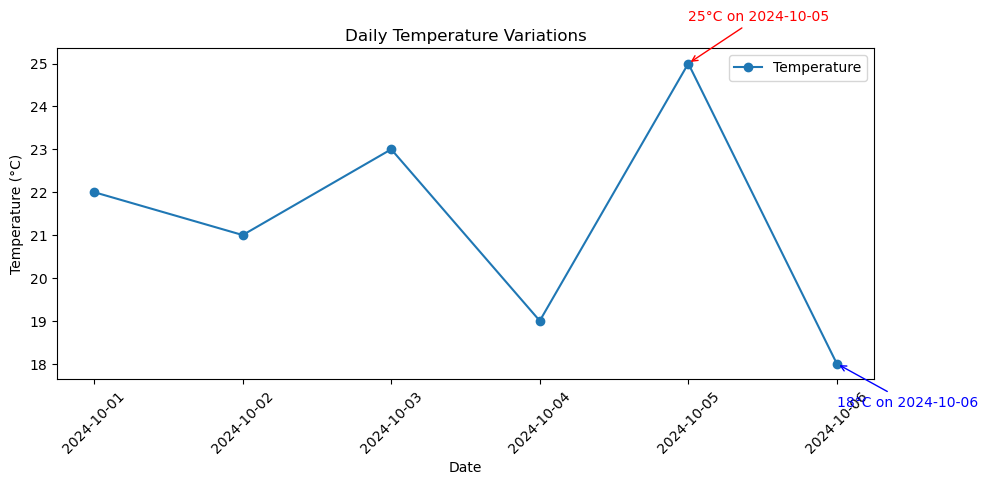

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample temperature data for demonstration
temperature_data = pd.DataFrame({
    "date": ["2024-10-01", "2024-10-02", "2024-10-03", "2024-10-04", "2024-10-05", "2024-10-06"],
    "temperature": [22, 21, 23, 19, 25, 18]
})
temperature_data['date'] = pd.to_datetime(temperature_data['date'])  # Ensure date is in datetime format

# Plot data
plt.figure(figsize=(10, 5))
plt.plot(temperature_data["date"], temperature_data["temperature"], label="Temperature", marker='o')

# Find highest and lowest temperature rows
max_temp = temperature_data.loc[temperature_data["temperature"].idxmax()]
min_temp = temperature_data.loc[temperature_data["temperature"].idxmin()]

# Annotate highest and lowest temperatures
plt.annotate(f'{max_temp["temperature"]}°C on {max_temp["date"].date()}', 
             xy=(max_temp["date"], max_temp["temperature"]),
             xytext=(max_temp["date"], max_temp["temperature"] + 1),
             arrowprops=dict(arrowstyle="->", color='red'), color='red')

plt.annotate(f'{min_temp["temperature"]}°C on {min_temp["date"].date()}', 
             xy=(min_temp["date"], min_temp["temperature"]),
             xytext=(min_temp["date"], min_temp["temperature"] - 1),
             arrowprops=dict(arrowstyle="->", color='blue'), color='blue')

# Formatting the plot
plt.title("Daily Temperature Variations")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd

# Sample sales data for demonstration (replace with your CSV file if available)
sales_data = pd.DataFrame({
    "product_id": [101, 102, 103, 104, 105],
    "date": ["2024-09-01", "2024-09-01", "2024-09-02", "2024-09-02", "2024-09-03"],
    "price": [500, 600, 300, 800, 700],
    "quantity": [20, 15, 40, 5, 10],
    "region": ["North", "South", "West", "North", "East"]
})
sales_data['date'] = pd.to_datetime(sales_data['date'])

# 1. Calculate total sales per region
sales_data['total_sales'] = sales_data['price'] * sales_data['quantity']
total_sales_by_region = sales_data.groupby('region')['total_sales'].sum().reset_index()

# 2. Calculate average price per unit per product_id
average_price_per_unit = sales_data.groupby('product_id').apply(
    lambda x: (x['price'] * x['quantity']).sum() / x['quantity'].sum()
).reset_index(name='average_price_per_unit')
sales_data = sales_data.merge(average_price_per_unit, on='product_id', how='left')

# 3. Filter rows where total sales exceed ₹10,000
filtered_data = sales_data[sales_data['total_sales'] > 10000]

# Display results
print("Total Sales by Region:\n", total_sales_by_region)
print("\nData with Average Price Per Unit:\n", sales_data)
print("\nFiltered Data:\n", filtered_data)


Total Sales by Region:
   region  total_sales
0   East         7000
1  North        14000
2  South         9000
3   West        12000

Data with Average Price Per Unit:
    product_id       date  price  quantity region  total_sales  \
0         101 2024-09-01    500        20  North        10000   
1         102 2024-09-01    600        15  South         9000   
2         103 2024-09-02    300        40   West        12000   
3         104 2024-09-02    800         5  North         4000   
4         105 2024-09-03    700        10   East         7000   

   average_price_per_unit  
0                   500.0  
1                   600.0  
2                   300.0  
3                   800.0  
4                   700.0  

Filtered Data:
    product_id       date  price  quantity region  total_sales  \
2         103 2024-09-02    300        40   West        12000   

   average_price_per_unit  
2                   300.0  
